# Regresión de la distancia ortogonal ...

$$y = mx + n$$
Dado $(x_0, y_0)$, se define la distancia entre el punto y la recta anterior como:
$$d = \frac{|y_0 - (mx_0 + b)|}{\sqrt{m^2 + 1}}$$

In [423]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

session = tf.Session()
iris = datasets.load_iris()

In [424]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

In [425]:
batch_size = 50
learning_rate = 0.5

In [426]:
x_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
m = tf.Variable(tf.random_normal(shape = [1, 1]))
n = tf.Variable(tf.random_normal(shape = [1, 1]))

In [427]:
y_predict = tf.add(tf.matmul(x_data, m), n)

In [428]:
deming_num = tf.abs(tf.subtract(y_target, tf.add(tf.matmul(x_data, m), n)))
demin_den = tf.sqrt(tf.add(tf.square(m), 1.0))
deming_loss = tf.reduce_mean(tf.truediv(deming_num, demin_den))

In [429]:
init = tf.global_variables_initializer()
session.run(init)

In [430]:
my_optim = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
train_step = my_optim.minimize(deming_loss)

In [431]:
loss_vect = []
for i in range(300):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])
    session.run(train_step, feed_dict = {x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(deming_loss, feed_dict = {x_data: rand_x, y_target: rand_y})
    loss_vect.append(temp_loss)
    if (i + 1) % 20 == 0:
        print("Paso # " + str(i + 1) + ", m = " + str(session.run(m)) + ", n = " + str(session.run(n)) + ", Loss = " + str(temp_loss))

Paso # 20, m = [[2.856687]], n = [[2.1018152]], Loss = 0.48483458
Paso # 40, m = [[2.6923628]], n = [[2.452692]], Loss = 0.4708124
Paso # 60, m = [[2.407813]], n = [[2.7722695]], Loss = 0.4496299
Paso # 80, m = [[1.9733287]], n = [[3.0367925]], Loss = 0.3473519
Paso # 100, m = [[1.6870463]], n = [[3.6061893]], Loss = 0.32130614
Paso # 120, m = [[1.3818933]], n = [[4.306869]], Loss = 0.2677473
Paso # 140, m = [[1.0369204]], n = [[4.527036]], Loss = 0.3091887
Paso # 160, m = [[0.98666215]], n = [[4.517735]], Loss = 0.26680496
Paso # 180, m = [[1.0083542]], n = [[4.4977317]], Loss = 0.2628214
Paso # 200, m = [[1.0354748]], n = [[4.5151405]], Loss = 0.24174275
Paso # 220, m = [[1.0751733]], n = [[4.552703]], Loss = 0.24014968
Paso # 240, m = [[1.1245224]], n = [[4.529304]], Loss = 0.29088485
Paso # 260, m = [[1.0425375]], n = [[4.663352]], Loss = 0.22265957
Paso # 280, m = [[1.0853598]], n = [[4.6224337]], Loss = 0.27527407
Paso # 300, m = [[1.0481925]], n = [[4.5862184]], Loss = 0.2025798

In [432]:
[[slope]] = session.run(m)
[[intercept]] = session.run(n)
print(str(np.round(slope, 3)) + "x + " + str(np.round(intercept, 3)))

1.048x + 4.586


In [433]:
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + intercept)

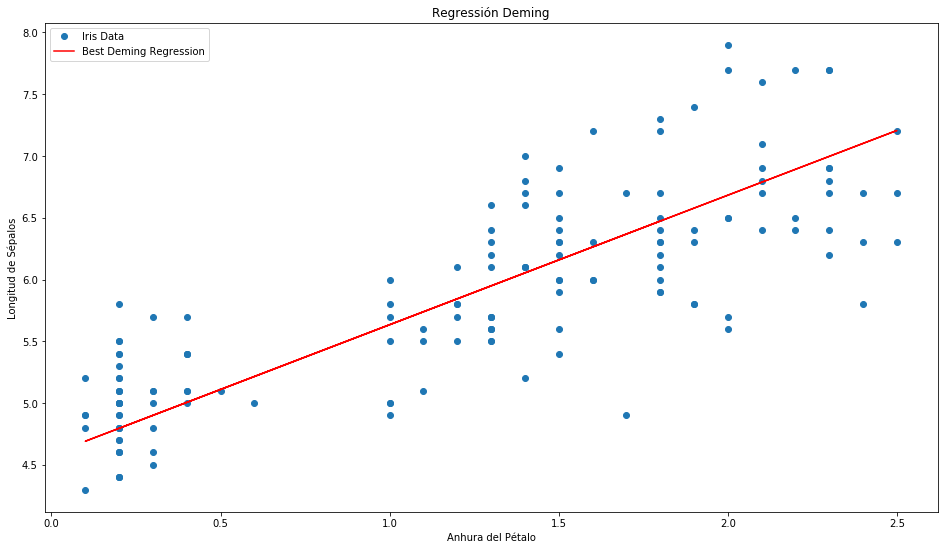

In [434]:
plt.figure(figsize = (16, 9))
plt.plot(x_vals, y_vals, "o", label = "Iris Data")
plt.plot(x_vals, best_fit, "r-", label = "Best Deming Regression")
plt.legend(loc = "upper left")
plt.title("Regressión Deming")
plt.xlabel("Anhura del Pétalo")
plt.ylabel("Longitud de Sépalos")
plt.show()

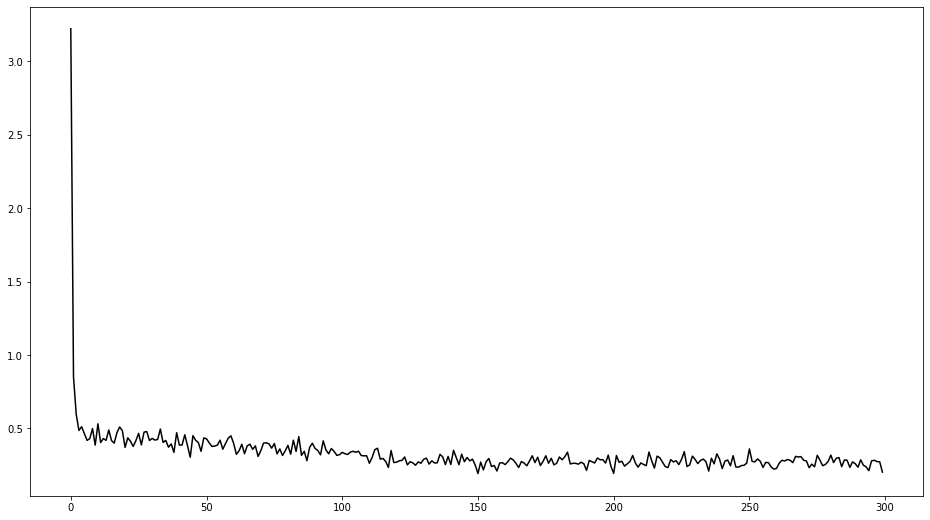

In [435]:
plt.figure(figsize = (16, 9))
plt.plot(loss_vect, "k-", label = "Función de Pérdidas")
plt.show()